# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

---

## 1. Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## 2. Loading data with Pandas

We need to load `Test_data.csv` and `pharma_data.csv` into individual dataframes so that we can work with them in Python

In [28]:
#Importing datasets
pharma_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")
Test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")

Looking at the first 5 rows of both dataframes to see what the data looks like

In [4]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
Test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


With the `pharma_data.csv`, we have a mix of numeric, categorical data and null values which we will need to transform before modelling.

---

## 3. Descriptive statistics of data

### Data types

In [6]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [7]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


The describe method gives us a lot of information about the data. The key point to take away from this is that we some  data, as exhibited by std

### Missing Values

In [8]:
#Checking for null values
pharma_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

Here, we can see that a hand full of columns have null values present.

In [9]:
# Filling null values with the next value on the column
pharma_data.Treated_with_drugs.fillna(method = "pad",inplace = True)
pharma_data.A.fillna(method = "pad",inplace = True)
pharma_data.B.fillna(method = "pad",inplace = True)
pharma_data.C.fillna(method = "pad",inplace = True)
pharma_data.D.fillna(method = "pad",inplace = True)
pharma_data.E.fillna(method = "pad",inplace = True)
pharma_data.F.fillna(method = "pad",inplace = True)
pharma_data.Z.fillna(method = "pad",inplace = True)

In [10]:
# Summing all our columns and using those values as Number_of_prev
cols = pharma_data[["A","B","C","D","E","F","Z"]]
cols = cols.sum(axis = 1)
pharma_data.Number_of_prev_cond = cols

In [11]:
#Now there are no null values
pharma_data.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

---
# Data visualization

Now let's create meaning and conclusions from the dataframes

## 1. Percentage of Survival

In [12]:
survived = pharma_data[["ID_Patient_Care_Situation","Survived_1_year"]]
survived.columns = ["Patients","Survived"]
survived_total = survived.groupby(["Survived"]).count().sort_values(by = "Patients",ascending=False)
survived_percent = (survived_total/survived_total.sum())*100
survived_percent

,Patients
Survived,
1,63.224661
0,36.775339


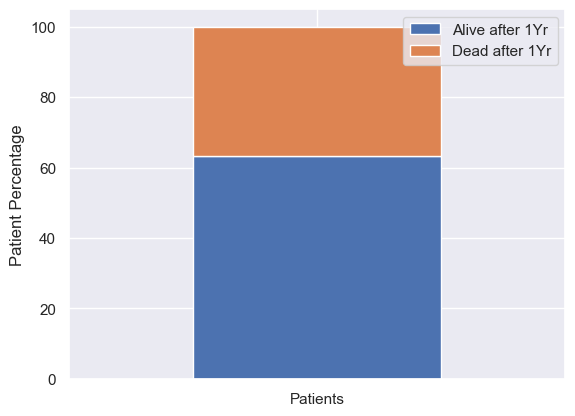

In [13]:
survived_percent.transpose().plot.bar(stacked = True,rot = 0)
plt.ylabel("Patient Percentage")
plt.legend(["Alive after 1Yr","Dead after 1Yr"],loc = "upper right")
plt.show()

About 36% of the total number are dead (8934 patients)

### Patients who smoke

Let's see the distribution of the patients who smoke. Since the  data is univariate, let's use histograms to visualize their distribution.

In [14]:
#There are rows that indicate "Cannot Say". Let's convert all the "Cannot Say" categories to YES OR NO
pharma_data.Patient_Smoker.replace("Cannot say","YES",inplace = True)
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX1,128,1.348400,YES,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [15]:
smokers = pharma_data[["ID_Patient_Care_Situation","Patient_Smoker","Survived_1_year"]]
smokers.columns = ["id","Patient_Smoker","Survived"]
smoker_total = smokers.groupby([smokers["Patient_Smoker"],smokers["Survived"]])["id"].count().unstack()
smoker_percent =  (smoker_total.div(smoker_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = False)
smoker_percent

Survived,0,1
Patient_Smoker,,
YES,50.908537,49.091463
NO,26.264533,73.735467


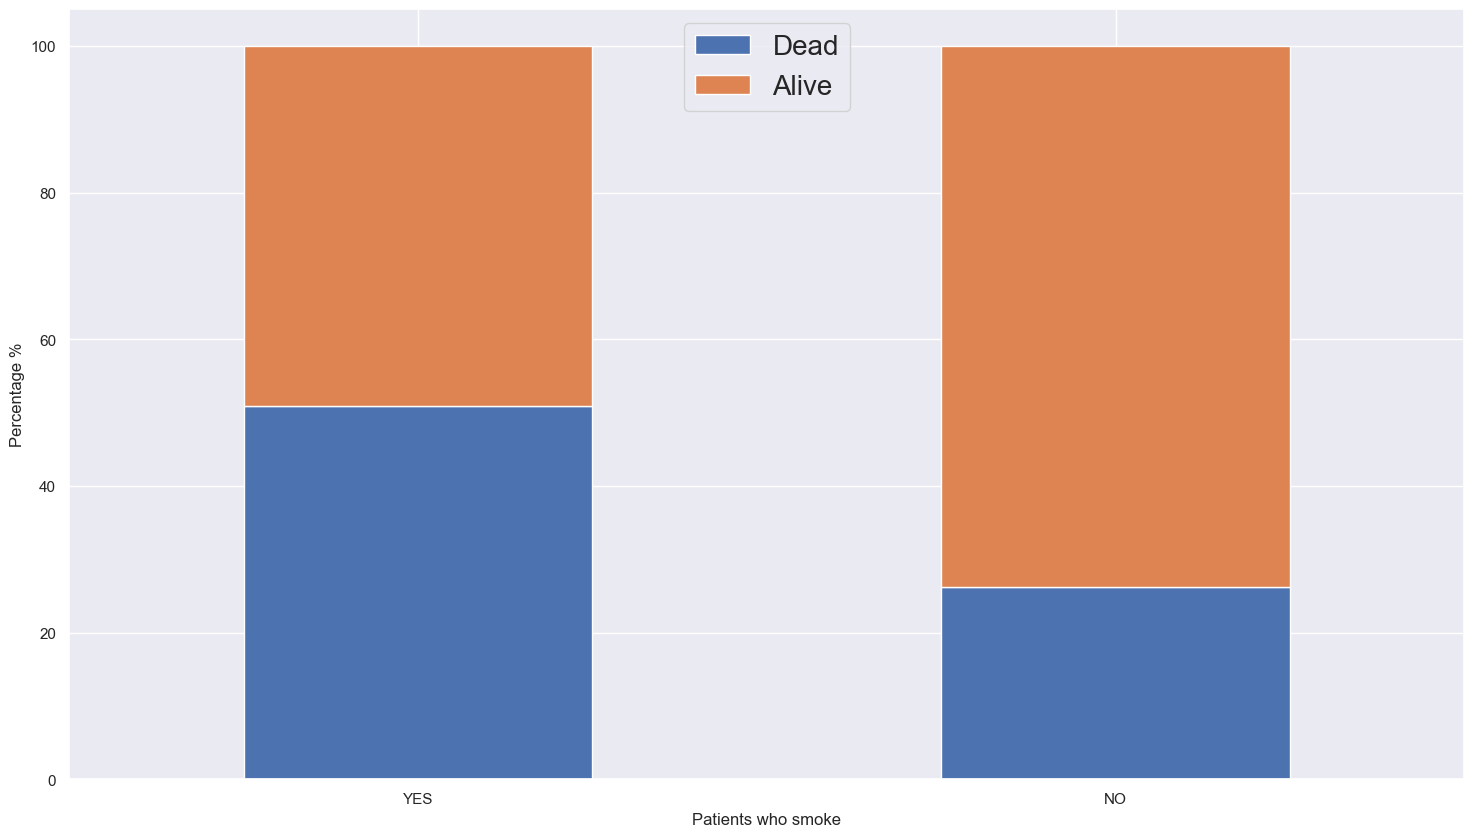

In [16]:
smoker_percent.plot.bar(stacked = True,rot =0,figsize=(18,10))
plt.ylabel("Percentage %")
plt.xlabel("Patients who smoke")
plt.legend(["Dead","Alive"],loc = "upper center",fontsize =20)
plt.show()

Smoking doesn't affect the rate of a patient's survival that much
 - 49% of smokers died as 51% of the same smokers survived
 - 26% of non smokers dies as 73% of the same non-smokers survived

## 3. RURAL or URBAN community

In [17]:
Rural_urban = pharma_data[["ID_Patient_Care_Situation","Patient_Rural_Urban","Survived_1_year"]]
Rural_urban.columns = ["id","Patient_Rural_Urban","Survival"]
Rural_urban_total = Rural_urban.groupby([Rural_urban["Patient_Rural_Urban"],Rural_urban["Survival"]])["id"].count().unstack()
Rural_urban_percent = (Rural_urban_total.div(Rural_urban_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = False)
Rural_urban_percent

Survival,0,1
Patient_Rural_Urban,,
URBAN,45.052420,54.947580
RURAL,33.203173,66.796827


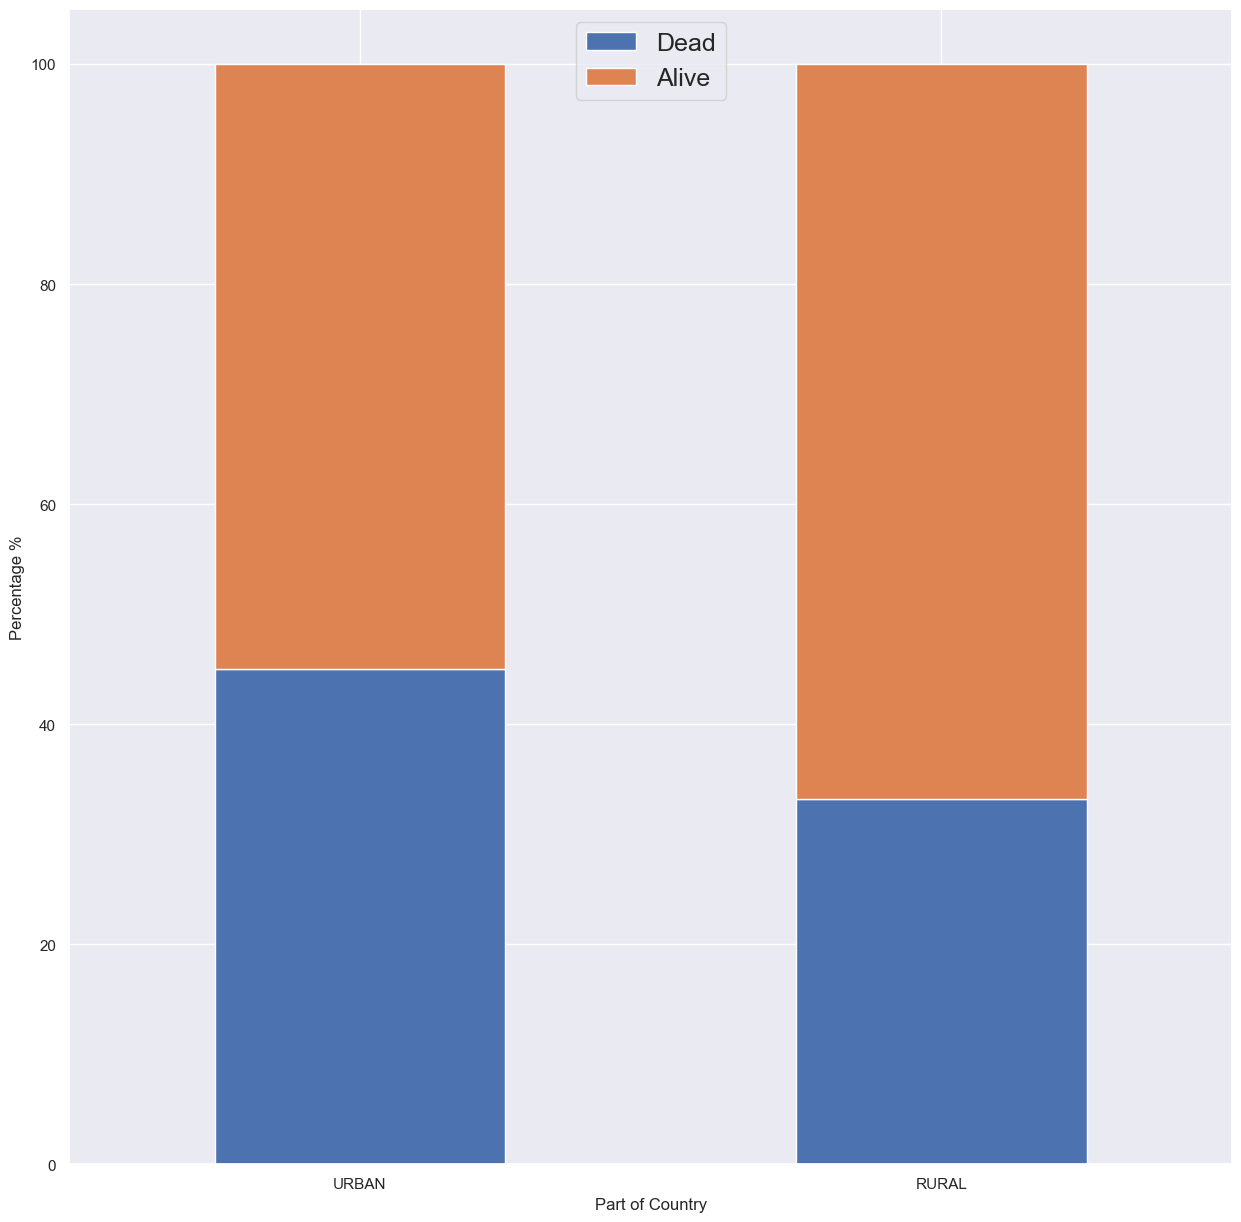

In [18]:
Rural_urban_percent.plot.bar(stacked = True,rot = 0,figsize=(15,15))
plt.legend(["Dead","Alive"],loc = "upper center",fontsize =18)
plt.ylabel("Percentage %")
plt.xlabel("Part of Country")
plt.show()

Rural
- 66% of Rural Residents survived
- 33% of Urban Residents died

Urban
- 54% of Urban Residents survived
- 45% of Urban Residents died


## 4. Patients with previous category of condition

In [19]:
Prev_con = pharma_data[["ID_Patient_Care_Situation","Number_of_prev_cond","Survived_1_year"]]
Prev_con.columns = ["id","Previous_con","Survival"]
Prev_con_total = Prev_con.groupby([Prev_con["Previous_con"],Prev_con["Survival"]])["id"].count().unstack()
Prev_con_percent = (Prev_con_total.div(Prev_con_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = True)
Prev_con_percent

Survival,0,1
Previous_con,,
1.0,34.208673,65.791327
2.0,36.542508,63.457492
3.0,41.757898,58.242102
4.0,59.761905,40.238095
5.0,94.594595,5.405405


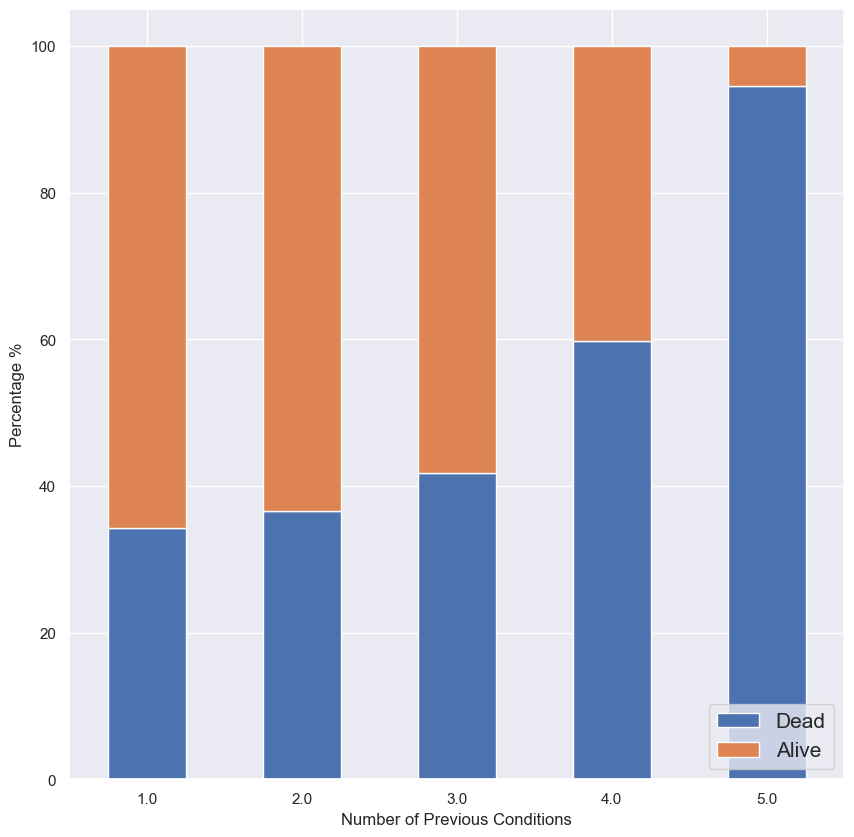

In [20]:
Prev_con_percent.plot.bar(stacked = True,rot = 0,figsize=(10,10))
plt.legend(["Dead","Alive"],loc = "lower right",fontsize = 15)
plt.ylabel("Percentage %")
plt.xlabel("Number of Previous Conditions")
plt.show()

---
This clearly shows the relationship between number of previous conditions and rate of survival
The more the number of previous conditions, the more the rate to death
- 94% of those with 5 previous conditions died
- 59% of those with 4 previous conditions died
- 41% of those with 3 previous conditions died
- 36% of those with 2 previous conditions died
- 34% of those with 1 previous condition died


## 5. Different Category of Previous Conditions

In [21]:
cat_prev_condition = pharma_data[["ID_Patient_Care_Situation","A","B","C","D","E","F","Z","Survived_1_year"]]
# cat_prev_condition_total = cat_prev_condition.groupby([cat_prev_condition["Previous_con"],cat_prev_condition["Survival"]])["id"].count().unstack()
# cat_prev_condition_percent = (Prev_con_total.div(Prev_con_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = True)
# Prev_con_percent
cat_prev_condition

,ID_Patient_Care_Situation,A,B,C,D,E,F,Z,Survived_1_year
0,22374,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,18164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6283,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,33012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
23092,15613,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0
23093,15503,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23094,2167,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23095,31646,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [22]:
pharma_data[pharma_data.A == 0]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,DX1,128,1.348400,YES,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
21,27197,14,2609,DX6,3,20.541924,NO,URBAN,Stable,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1
32,8165,40,8908,DX5,58,18.477448,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
34,18320,48,722,DX4,62,18.500535,YES,RURAL,Stable,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
35,22915,52,616,DX6,31,28.168665,YES,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23051,20216,30,10811,DX1 DX2 DX5,49,26.630933,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
23056,31149,22,11385,DX1,26,25.737911,YES,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1
23072,12303,27,12395,DX2 DX5,30,24.407543,NO,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
23073,10560,35,11105,DX6,60,24.368056,NO,URBAN,Stable,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


## 6. Patient Age

In [23]:
age = pharma_data[["ID_Patient_Care_Situation","Diagnosed_Condition","Survived_1_year"]]
age.columns = ["id","Age","Survival"]
age = pd.DataFrame({"Survived":age[age["Survival"]==1]["Age"],
                     "Died":age[age["Survival"]==0]["Age"]

})
age

,Survived,Died
0,NaN,8.0
1,5.0,NaN
2,NaN,23.0
3,51.0,NaN
4,0.0,NaN
...,...,...
23092,NaN,3.0
23093,41.0,NaN
23094,NaN,24.0
23095,11.0,NaN


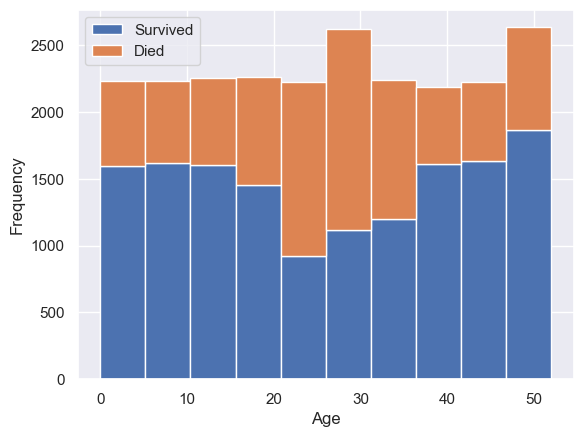

In [24]:
age[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Age")
plt.show()

In [25]:
#We will annotate to see which condition has the most survivors

## 7.Treated with Drugs

In [26]:
drugs = pharma_data[["ID_Patient_Care_Situation","Treated_with_drugs","Survived_1_year"]]
drugs.columns = ["id","Treated_with_drugs","Survival"]
drugs = pd.DataFrame({"Survived":drugs[drugs["Survival"]==1]["Treated_with_drugs"],
                    "Died":drugs[drugs["Survival"]==0]["Treated_with_drugs"]

})
drugs

,Survived,Died
0,NaN,DX6
1,DX2,NaN
2,NaN,DX6
3,DX1,NaN
4,DX1,NaN
...,...,...
23092,NaN,DX2 DX4
23093,DX6,NaN
23094,NaN,DX6
23095,DX3,NaN


In [27]:
drugs[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Diagnosed Condition")
plt.show()

TypeError: no numeric data to plot

In [ ]:
pharma_data.Treated_with_drugs.value_counts()

## 8. Patient ID

In [ ]:
p_id = pharma_data[["ID_Patient_Care_Situation","Patient_ID","Survived_1_year"]]
p_id.columns = ["id","Patient_ID","Survival"]
p_id = pd.DataFrame({"Survived":p_id[p_id["Survival"]==1]["Patient_ID"],
                      "Died":p_id[p_id["Survival"]==0]["Patient_ID"]

                      })
p_id

In [ ]:
p_id[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Diagnosed Condition")
plt.show()

## 9. Body Mass Ratio

In [ ]:
bmr = pharma_data[["ID_Patient_Care_Situation","Patient_Body_Mass_Index","Survived_1_year"]]
bmr.columns = ["id","Patient_Body_Mass_Index","Survival"]
bmr = pd.DataFrame({"Survived":bmr[bmr["Survival"]==1]["Patient_Body_Mass_Index"],
                     "Died":bmr[bmr["Survival"]==0]["Patient_Body_Mass_Index"]

                     })
bmr

In [ ]:
bmr[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Patient_Body_Mass_Index")
plt.show()